# Time Series Analysis

In this analysis, we will conduct time series analysis of the financial data as follows:

1. Setup the environment to access and download latest stock data, using either Quandl or Yahoo Finance.

2. Obtain the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months.

3. Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. Plot the autocorrelation of the adjusted month-end close prices for each of the stocks.

5. Calculate the monthly returns for each stock using the "shift trick" (use `shift()` function).

6. Combine all 4 time series (returns) into a single DataFrame, and visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).

## Downloading Stock Prices

### Option 1 - Using QUANDL

In [1]:
# load libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#from decimal import *
from pandas.plotting import autocorrelation_plot

In [2]:
# all imports and env variables
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web

# This line of code should work on Windows and Mac
%env QUANDL_API_KEY = 9S-27RJsrdMePDD8MxzN

# If the above line of code does not work on your system,
# You can use this way of setting Quandl env variable
import quandl
quandl.ApiConfig.api_key = "9S-27RJsrdMePDD8MxzN"

env: QUANDL_API_KEY=9S-27RJsrdMePDD8MxzN


### Option 2 - Using Yahoo Finance `fix_yahoo_finance` library

In [3]:
import fix_yahoo_finance as yf
from pandas_datareader import data as pdr

# 1) Using pandas datareader and Yahoo Finance
yf.pdr_override()

#amzn = pdr.get_data_yahoo('AMZN', start = start)

In [4]:
# 2) Using fix_yahoo_finance library only to download AMZN data
start = '2014-03-01'
end = '2019-03-01'

# Download the adjusted close prices for FB, MMM, IBM and AMZN for the last 60 months
fb = yf.download('FB', start, end)['Adj Close']
mmm = yf.download('MMM', start, end)['Adj Close']
ibm = yf.download('IBM', start, end)['Adj Close']
amzn = yf.download('AMZN', start, end)['Adj Close']

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [5]:
# Resample the data to get prices for the end of the business month
# Selecting only one column, Adj Close, setting Date to be index 
fb = fb.asfreq(freq = 'BM', method='pad')
mmm = mmm.asfreq(freq = 'BM', method='pad')
ibm = ibm.asfreq(freq = 'BM', method='pad')
amzn = amzn.asfreq(freq = 'BM', method='pad')

In [6]:
fb.head()

Date
2014-03-31    60.240002
2014-04-30    59.779999
2014-05-30    63.299999
2014-06-30    67.290001
2014-07-31    72.650002
Freq: BM, Name: Adj Close, dtype: float64

In [7]:
# Validate that the index is a DateTimeIndex
fb.index

DatetimeIndex(['2014-03-31', '2014-04-30', '2014-05-30', '2014-06-30',
               '2014-07-31', '2014-08-29', '2014-09-30', '2014-10-31',
               '2014-11-28', '2014-12-31', '2015-01-30', '2015-02-27',
               '2015-03-31', '2015-04-30', '2015-05-29', '2015-06-30',
               '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-30',
               '2015-11-30', '2015-12-31', '2016-01-29', '2016-02-29',
               '2016-03-31', '2016-04-29', '2016-05-31', '2016-06-30',
               '2016-07-29', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-30', '2017-01-31', '2017-02-28',
               '2017-03-31', '2017-04-28', '2017-05-31', '2017-06-30',
               '2017-07-31', '2017-08-31', '2017-09-29', '2017-10-31',
               '2017-11-30', '2017-12-29', '2018-01-31', '2018-02-28',
               '2018-03-30', '2018-04-30', '2018-05-31', '2018-06-29',
               '2018-07-31', '2018-08-31', '2018-09-28', '2018-10-31',
      

In [9]:
mmm.head()

Date
2014-03-31    119.584930
2014-04-30    122.608490
2014-05-30    126.429359
2014-06-30    127.041283
2014-07-31    124.957031
Freq: BM, Name: Adj Close, dtype: float64

In [11]:
ibm.head()

Date
2014-03-31    157.730820
2014-04-30    160.992111
2014-05-30    151.948441
2014-06-30    149.401718
2014-07-31    157.973312
Freq: BM, Name: Adj Close, dtype: float64

In [13]:
amzn.head()

Date
2014-03-31    336.369995
2014-04-30    304.130005
2014-05-30    312.549988
2014-06-30    324.779999
2014-07-31    312.989990
Freq: BM, Name: Adj Close, dtype: float64

In [16]:
# If we want to download multipe stocks into a single dataframe:
all_stocks_list = ['FB', 'MMM', 'IBM', 'AMZN']
all_stocks = yf.download(all_stocks_list, start, end)['Adj Close'].asfreq(freq = 'BM', method='pad')

[*********************100%***********************]  4 of 4 downloaded


In [16]:
all_stocks.head()

,AMZN,FB,IBM,MMM
Date,,,,
2014-03-31,336.369995,60.240002,157.730820,119.584930
2014-04-30,304.130005,59.779999,160.992111,122.608490
2014-05-30,312.549988,63.299999,151.948441,126.429359
2014-06-30,324.779999,67.290001,149.401718,127.041283
2014-07-31,312.989990,72.650002,157.973312,124.957031


Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.

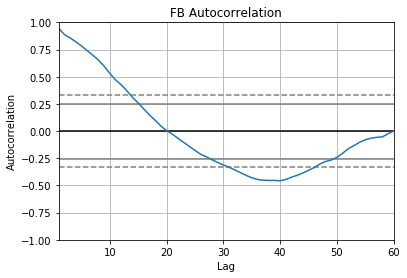

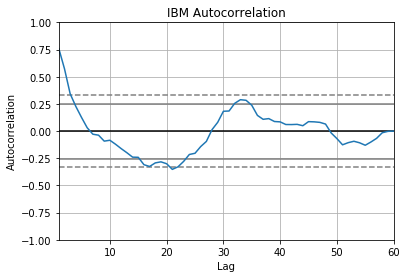

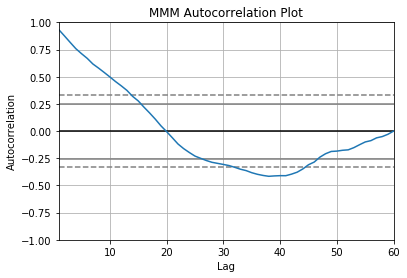

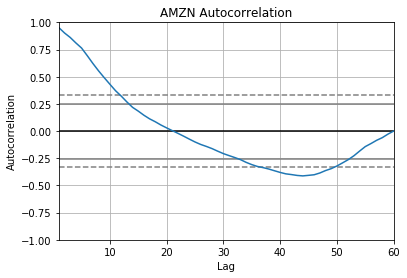

In [8]:
# Plot the autocorrelation of the adjusted month-end close prices for each stocks

plt.figure()
autocorrelation_plot(fb)
plt.title('FB Autocorrelation')
plt.figure()
autocorrelation_plot(ibm)
plt.title('IBM Autocorrelation')
plt.figure()
autocorrelation_plot(mmm)
plt.title('MMM Autocorrelation Plot')
plt.figure()
autocorrelation_plot(amzn)
plt.title('AMZN Autocorrelation')
plt.show()

**Explanation of the graphs:** If the line is above or below the dotted line, not in between, we can say that the correlation is significant, and that the adjusted closed price is correlated to time. 

We can observe a similar trend among FB, MMM, and AMZN stocks: past returns seem to influence its future return. We can see that in the first 10 months, there is a positive correlation between stock price and time. From 2015 - 2017, a negative correlation is shown. However, the autocorrelation plot for IBM shows that most of the correlaton are not statistically significant. This indicates that the returns are not highly correlated.

Additionally, both `Series` and `DataFrame` have a `shift()` method which shifts *data* without changing the index. The shift is specified as multiples of the frequency. The positive values shift past values forward.

In [10]:
# Calculate the monthly returns for each stock using the "shift trick"
fb_returns = (fb / fb.shift(1) - 1)
fb_returns.name = 'FB'
fb_returns.head()

Date
2014-03-31         NaN
2014-04-30   -0.007636
2014-05-30    0.058883
2014-06-30    0.063033
2014-07-31    0.079655
Freq: BM, Name: FB, dtype: float64

In [11]:
ibm_returns = (ibm / ibm.shift(1) - 1)
ibm_returns.name = 'IBM'
ibm_returns.head()

Date
2014-03-31         NaN
2014-04-30    0.020676
2014-05-30   -0.056175
2014-06-30   -0.016761
2014-07-31    0.057373
Freq: BM, Name: IBM, dtype: float64

In [12]:
mmm_returns = (mmm / mmm.shift(1) - 1)
mmm_returns.name = 'MMM'
mmm_returns.head()

Date
2014-03-31         NaN
2014-04-30    0.025284
2014-05-30    0.031163
2014-06-30    0.004840
2014-07-31   -0.016406
Freq: BM, Name: MMM, dtype: float64

In [13]:
amzn_returns = (amzn / amzn.shift(1) - 1)
amzn_returns.name = 'AMZN'
amzn_returns.head()

Date
2014-03-31         NaN
2014-04-30   -0.095847
2014-05-30    0.027685
2014-06-30    0.039130
2014-07-31   -0.036302
Freq: BM, Name: AMZN, dtype: float64

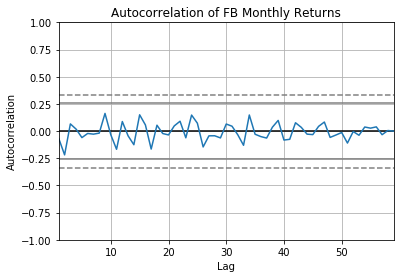

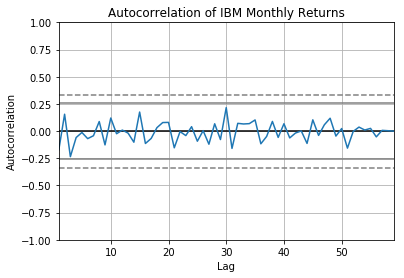

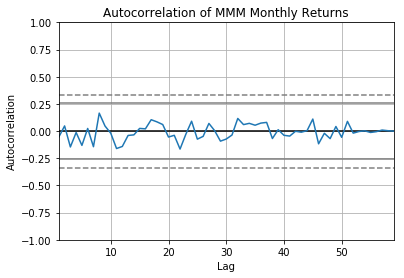

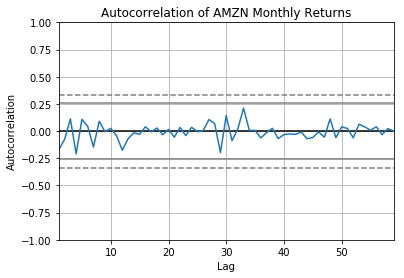

In [14]:
# Plot the auto-correlation of the returns
plt.figure()
autocorrelation_plot(fb_returns.dropna())
plt.title('Autocorrelation of FB Monthly Returns')
plt.figure()
autocorrelation_plot(ibm_returns.dropna())
plt.title('Autocorrelation of IBM Monthly Returns')
plt.figure()
autocorrelation_plot(mmm_returns.dropna())
plt.title('Autocorrelation of MMM Monthly Returns')
plt.figure()
autocorrelation_plot(amzn_returns.dropna())
plt.title('Autocorrelation of AMZN Monthly Returns')
plt.show()

From the above graphs, we can observe a similar trend among all four stocks. Time is insignificantly related to the return.  All graphs are well bellow the 95% confidence band. As we can see in the plot, there is no significant trend seen in the month-end returns, the values are randomly distributed, and therefore, we can conclude that the stock price returns are not affected by time.

**NOTE:** After we used the shift() formula, the first row in time series, corresponding to the 2014-03-31 index became NaN. We have dropped these rows using dropna() function, otherwise the plots would have been empty.

Next, we will combine all 4 time series (returns) into a single DataFrame and visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use scatter_matrix() function from pandas.plotting).

In [18]:
# Combine all 4 time series into a datafame for further analysis
all_returns = pd.concat([fb_returns, ibm_returns, mmm_returns, amzn_returns], join='outer', axis = 1)

In [20]:
# Drop the first row with NANs
all_returns.dropna().head()

,FB,IBM,MMM,AMZN
Date,,,,
2014-04-30,-0.007636,0.020676,0.025284,-0.095847
2014-05-30,0.058883,-0.056175,0.031163,0.027685
2014-06-30,0.063033,-0.016761,0.004840,0.039130
2014-07-31,0.079655,0.057373,-0.016406,-0.036302
2014-08-29,0.029869,0.009220,0.028168,0.083230


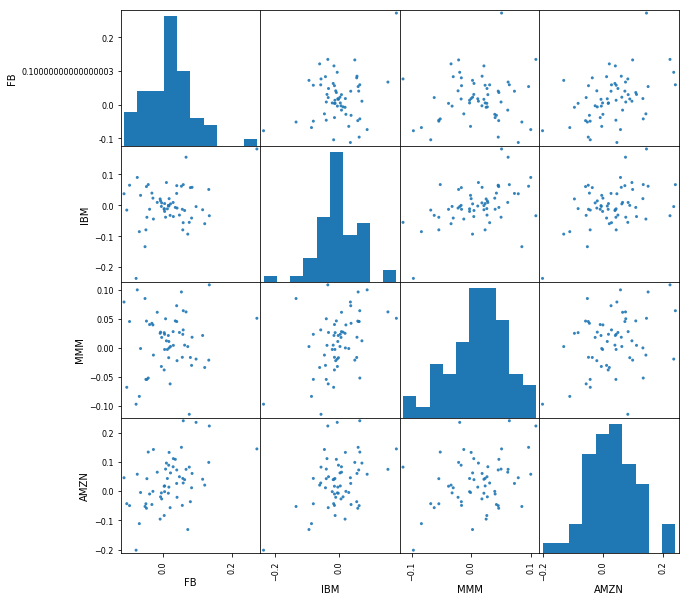

In [22]:
# Scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(all_returns.dropna(), alpha=0.9, figsize=(10, 10), diagonal='hist');

Scatter plot matrix allows us to quickly see any highly correlated variables or outliers. However, there is no pattern in the scatter plots, which indicates that the returns are not correlated with each other. We have also plotted the histogram of the individual returns in the diagonal cells, this was specified by the `diagonal='hist'` parameter.